In [112]:
import pandas as pd

In [113]:
df = pd.read_csv('Task1 Solution.csv')
print(df)

C:\Users\user\AppData\Local\Temp\ipykernel_14856\4203803767.py:1: DtypeWarning: Columns (0,1,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Task1 Solution.csv')


                  Name Platform    Year    Genre   Publisher  \
0                 1942      NES  1985.0  Shooter      Capcom   
1        [Prototype 2]     X360  2012.0   Action  Activision   
2        [Prototype 2]      PS3  2012.0   Action  Activision   
3        [Prototype 2]       PC  2012.0   Action  Activision   
4          [Prototype]     X360  2009.0   Action  Activision   
...                ...      ...     ...      ...         ...   
1048570            NaN      NaN     NaN      NaN         NaN   
1048571            NaN      NaN     NaN      NaN         NaN   
1048572            NaN      NaN     NaN      NaN         NaN   
1048573            NaN      NaN     NaN      NaN         NaN   
1048574            NaN      NaN     NaN      NaN         NaN   

         North_American_Sales  European_Sales  Japanese_Sales  Other_Sales  \
0                      650000          140000          210000            0   
1                      480000          250000               0        70000 

# NOW I WANT TO DISPLAY SOME SUMMARY STATISTICS

In [114]:
summary = df.drop(columns=['Year']).describe()
print(summary)

       North_American_Sales  European_Sales  Japanese_Sales   Other_Sales  \
count          1.048575e+06    1.048575e+06    1.048575e+06  1.048575e+06   
mean           4.189448e+03    2.321369e+03    1.231214e+03  7.607944e+02   
std            1.079268e+05    6.616071e+04    4.010465e+04  2.447295e+04   
min            0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
25%            0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
50%            0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
75%            0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00   
max            4.149000e+07    2.902000e+07    1.022000e+07  1.057000e+07   

       Global_Sales  
count  1.048575e+06  
mean   8.507050e+03  
std    2.068187e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    8.274000e+07  


# NOW TO DETERMINE MY KEY METRICS 

In [115]:
# Using our Global Sales to Determine our Top-Selling Games Globally 
top_selling_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
print("\nTop-Selling Games:")
print(top_selling_games)


Top-Selling Games:
                            Name  Global_Sales
15879                 Wii Sports      82740000
13393          Super Mario Bros.      40240000
7836              Mario Kart Wii      35820000
15881          Wii Sports Resort      33000000
10532   Pokemon Red/Pokemon Blue      31370000
13868                     Tetris      30260000
9551       New Super Mario Bros.      30010000
15877                   Wii Play      29020000
9554   New Super Mario Bros. Wii      28620000
3697                   Duck Hunt      28310000


In [116]:
# Top Sales per Genre 
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
print (genre_sales)

           Genre  Global_Sales
0         Action    1751180000
1      Adventure     239040000
2       Fighting     448910000
3           Misc     809960000
4       Platform     831370000
5         Puzzle     244950000
6         Racing     732040000
7   Role-Playing     927210000
8        Shooter    1037370000
9     Simulation     392200000
10        Sports    1330930000
11      Strategy     175120000


In [117]:
# The highest and lowest selling genres
most_sales_per_genre = genre_sales.loc[genre_sales['Global_Sales'].idxmax()]
least_sales_per_genre = genre_sales.loc[genre_sales['Global_Sales'].idxmin()]

print("Most Sales per Genre:")
print(most_sales_per_genre)

print("Least Sales per Genre:")
print(least_sales_per_genre)

Most Sales per Genre:
Genre               Action
Global_Sales    1751180000
Name: 0, dtype: object
Least Sales per Genre:
Genre            Strategy
Global_Sales    175120000
Name: 11, dtype: object


In [118]:
# Publisher with Most/Least Sales
# Total sales per publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Publisher with most sales
most_sales_publisher = publisher_sales.loc[publisher_sales['Global_Sales'].idxmax()]
least_sales_publisher = publisher_sales.loc[publisher_sales['Global_Sales'].idxmin()]

print("Publisher with Most Sales:")
print(most_sales_publisher)

print("Publisher with Least Sales:")
print(least_sales_publisher)

Publisher with Most Sales:
Publisher         Nintendo
Global_Sales    1786560000
Name: 359, dtype: object
Publisher with Least Sales:
Publisher       Ascaron Entertainment
Global_Sales                    10000
Name: 45, dtype: object


In [119]:
# Publishers with the Most/Least Sales per Year 

# Total sales per publisher and year
publisher_year_sales = df.groupby(['Publisher', 'Year'])['Global_Sales'].sum().reset_index()

most_sales_per_year = publisher_year_sales.loc[publisher_year_sales.groupby('Year')['Global_Sales'].idxmax()]
least_sales_per_year = publisher_year_sales.loc[publisher_year_sales.groupby('Year')['Global_Sales'].idxmin()]

print("Publisher with Most Sales per Year:")
print(most_sales_per_year)

print("Publisher with Least Sales per Year:")
print(least_sales_per_year)

Publisher with Most Sales per Year:
                        Publisher    Year  Global_Sales
225                         Atari  1980.0       8360000
91                     Activision  1981.0       8500000
227                         Atari  1982.0      19430000
1470                     Nintendo  1983.0      10960000
1471                     Nintendo  1984.0      45560000
1472                     Nintendo  1985.0      49950000
1473                     Nintendo  1986.0      16180000
1474                     Nintendo  1987.0      11950000
1475                     Nintendo  1988.0      36440000
1476                     Nintendo  1989.0      63880000
1477                     Nintendo  1990.0      35490000
1478                     Nintendo  1991.0      15970000
1479                     Nintendo  1992.0      38110000
1480                     Nintendo  1993.0      20040000
1481                     Nintendo  1994.0      24990000
1802  Sony Computer Entertainment  1995.0      18450000
1483        

In [120]:
# Platforms with Most/Least Sales per Genre

# Total sales per platform and genre
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# Platform with most sales per genre
most_sales_platform = platform_genre_sales.loc[platform_genre_sales.groupby('Genre')['Global_Sales'].idxmax()]
print("Platform with Most Sales per Genre:")
print(most_sales_platform)

# Platform with least sales per genre
least_sales_platform = platform_genre_sales.loc[platform_genre_sales.groupby('Genre')['Global_Sales'].idxmin()]
print("Platform with Least Sales per Genre:")
print(least_sales_platform)

Platform with Most Sales per Genre:
    Platform         Genre  Global_Sales
153      PS3        Action     307880000
35        DS     Adventure      47290000
143      PS2      Fighting      92600000
237      Wii          Misc     221060000
108      NES      Platform      95780000
39        DS        Puzzle      84290000
147      PS2        Racing     156280000
41        DS  Role-Playing     126850000
266     X360       Shooter     278550000
43        DS    Simulation     132030000
244      Wii        Sports     292060000
127       PC      Strategy      45880000
Platform with Least Sales per Genre:
    Platform         Genre  Global_Sales
201      SAT        Action        650000
10       3DO     Adventure         60000
118       PC      Fighting        270000
84       GEN          Misc         30000
91        GG      Platform         40000
11       3DO        Puzzle         20000
215      SCD        Racing         70000
128     PCFX  Role-Playing         30000
231     TG16       Shoote

In [121]:
# Total number of games sold per publisher
total_games_per_publisher = df.groupby('Publisher')['Global_Sales'].count().reset_index()
total_games_per_publisher.columns = ['Publisher', 'Global_Sales']
print("Total Games Sold per Publisher:")
print(total_games_per_publisher)

# Average number of games sold per publisher
avg_games_per_publisher = total_games_per_publisher['Global_Sales'].mean()
print(f'Average Games Sold per Publisher: {avg_games_per_publisher}')

Total Games Sold per Publisher:
                        Publisher  Global_Sales
0                 10TACLE Studios             3
1                      1C Company             3
2    20th Century Fox Video Games             5
3                          2D Boy             1
4                             3DO            36
..                            ...           ...
573                   id Software             1
574               imageepoch Inc.             2
575          inXile Entertainment             1
576                     mixi, Inc             1
577                  responDESIGN             2

[578 rows x 2 columns]
Average Games Sold per Publisher: 28.614186851211073


In [122]:
# Genres with over 500,000 copies sold 

# Filter for sales over 500,000
high_sales = df[df['Global_Sales'] > 500000]

# Genres with sales over 500,000
high_sales_genres = high_sales.groupby('Genre')['Global_Sales'].sum().reset_index()
print("Genres with Sales Over 500,000:")
print(high_sales_genres)

Genres with Sales Over 500,000:
           Genre  Global_Sales
0         Action    1343990000
1      Adventure     129230000
2       Fighting     347620000
3           Misc     599500000
4       Platform     735050000
5         Puzzle     187520000
6         Racing     586150000
7   Role-Playing     764090000
8        Shooter     899420000
9     Simulation     288810000
10        Sports    1035740000
11      Strategy     103080000


In [123]:
# Publishers with over 500,000 copies sold 

# Filter for sales over 500,000
high_sales = df[df['Global_Sales'] > 500000]

# Publishers with sales over 500,000
high_sales_publishers = high_sales.groupby('Publisher')['Global_Sales'].sum().reset_index()
print("Publishers with Sales Over 500,000:")
print(high_sales_publishers)



Publishers with Sales Over 500,000:
                        Publisher  Global_Sales
0    20th Century Fox Video Games        790000
1                             3DO       4630000
2                       505 Games      34050000
3                     989 Studios      10720000
4                       ASC Games       1970000
..                            ...           ...
156            Wizard Video Games        620000
157                   Xseed Games        550000
158        Zoo Digital Publishing       1730000
159                     Zoo Games       1310000
160                     mixi, Inc        860000

[161 rows x 2 columns]


# NOW IT'S TIME FOR SOME SEGMENTATION AND PROFILING 
I'm create segments of customers and products based on specific criteria and then creating profiles.


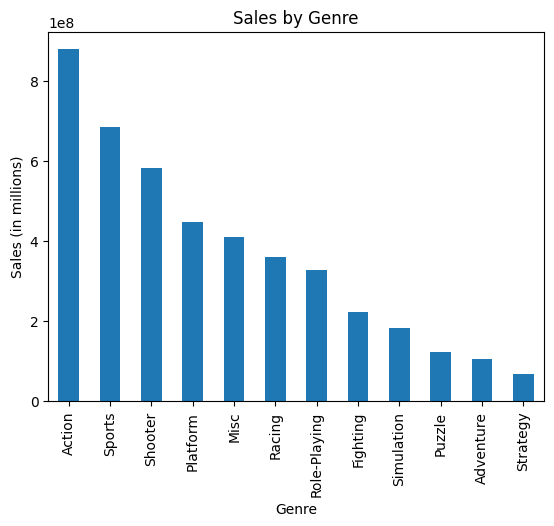

In [124]:
# Segment by Genre in North America Alone 
genre_sales = df.groupby('Genre')['North_American_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar')
plt.title('Sales by Genre')
plt.ylabel('Sales (in millions)')    
plt.show()

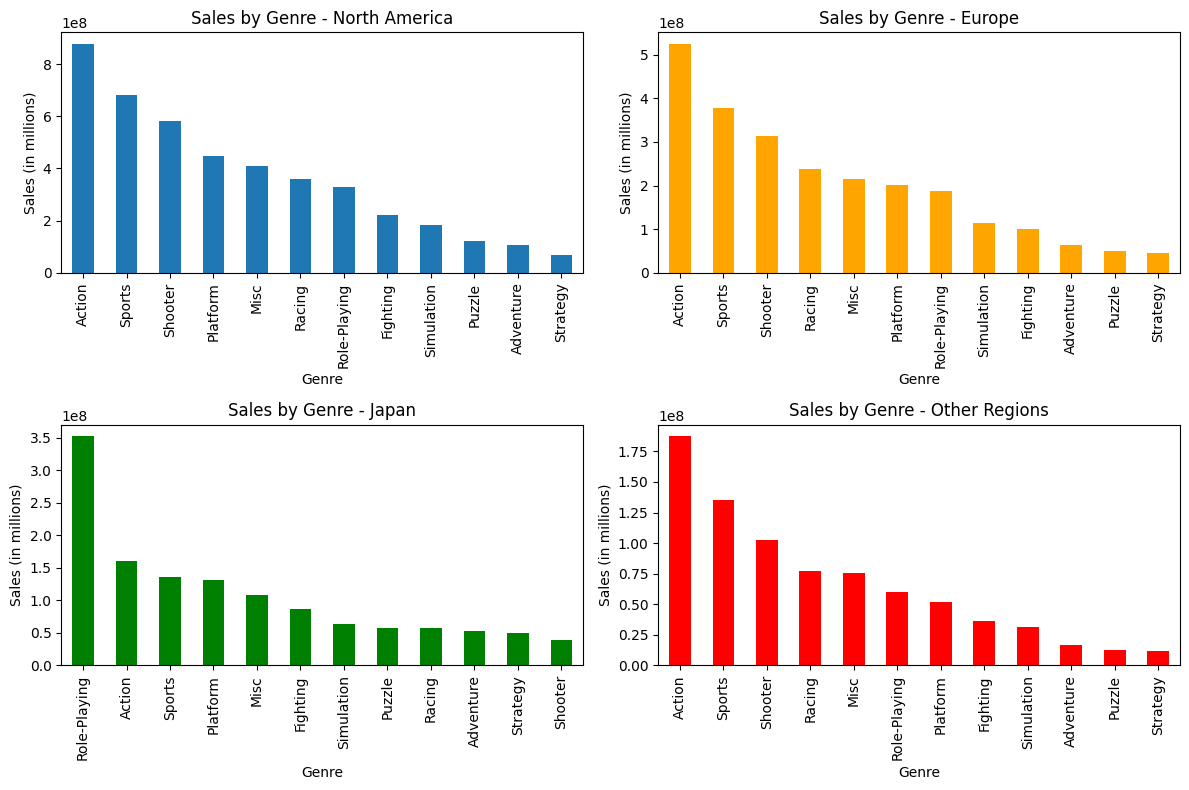

In [125]:
# Segment by Genre in Every Region
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group by Genre for each region
genre_sales_na = df.groupby('Genre')['North_American_Sales'].sum().sort_values(ascending=False)
genre_sales_eu = df.groupby('Genre')['European_Sales'].sum().sort_values(ascending=False)
genre_sales_jp = df.groupby('Genre')['Japanese_Sales'].sum().sort_values(ascending=False)
genre_sales_other = df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

# Plotting for North American Sales
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
genre_sales_na.plot(kind='bar')
plt.title('Sales by Genre - North America')
plt.ylabel('Sales (in millions)')

# Plotting for European Sales
plt.subplot(2, 2, 2)
genre_sales_eu.plot(kind='bar', color='orange')
plt.title('Sales by Genre - Europe')
plt.ylabel('Sales (in millions)')

# Plotting for Japanese Sales
plt.subplot(2, 2, 3)
genre_sales_jp.plot(kind='bar', color='green')
plt.title('Sales by Genre - Japan')
plt.ylabel('Sales (in millions)')

# Plotting for Other Sales
plt.subplot(2, 2, 4)
genre_sales_other.plot(kind='bar', color='red')
plt.title('Sales by Genre - Other Regions')
plt.ylabel('Sales (in millions)')

plt.tight_layout()
plt.show()


In [126]:
# Profile of Publishers 
publisher_profile = df.groupby('Publisher').agg({
    'North_American_Sales': 'sum',
    'European_Sales': 'sum',
    'Japanese_Sales': 'sum',
    'Other_Sales': 'sum'
}).sort_values(by='North_American_Sales', ascending=False)
print(publisher_profile)

                             North_American_Sales  European_Sales  \
Publisher                                                           
Nintendo                                816870000       418740000   
Electronic Arts                         595070000       371270000   
Activision                              429700000       215530000   
Sony Computer Entertainment             265220000       187720000   
Ubisoft                                 253430000       163320000   
...                                           ...             ...   
Rain Games                                      0           10000   
Grand Prix Games                                0               0   
Glams                                           0               0   
Giza10                                          0               0   
Fuji                                            0               0   

                             Japanese_Sales  Other_Sales  
Publisher                                  

# NOW LET'S IDENTIFY CORRELATION AND TRENDS 

C:\Users\user\AppData\Local\Temp\ipykernel_14856\2696390932.py:8: DtypeWarning: Columns (0,1,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Task1 Solution.csv')


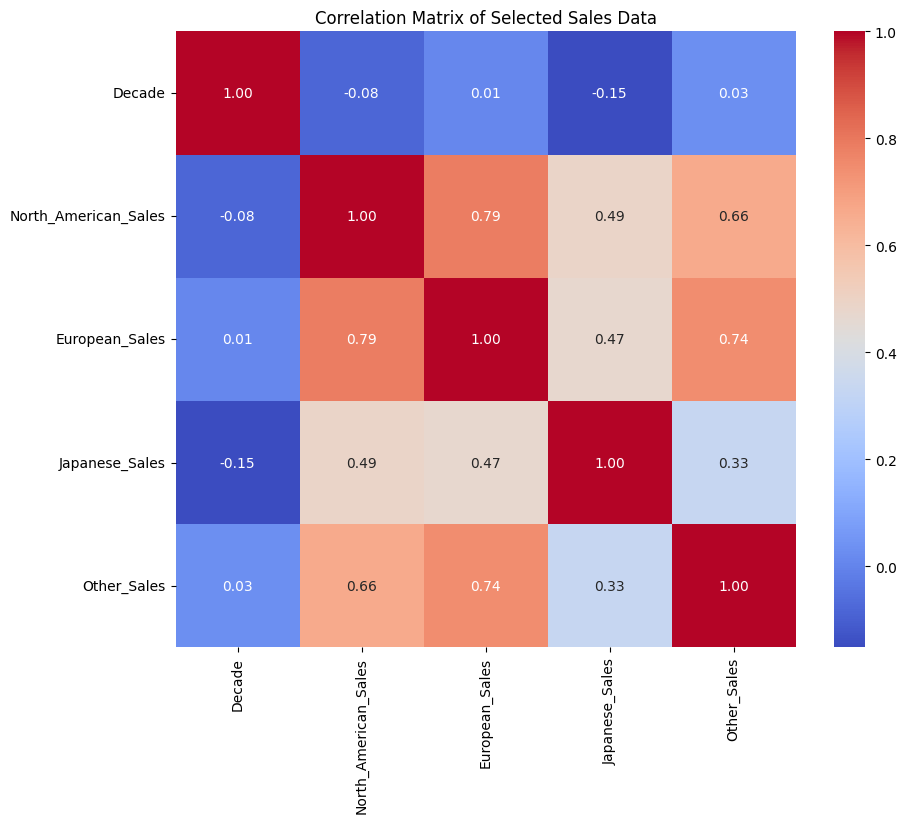

In [127]:
# Let's determine our correlation matrix from cells with just integers 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Task1 Solution.csv')

# Create a 'Decade' column
df['Decade'] = (df['Year'] // 10) * 10

# Select the relevant columns for correlation
correlation_columns = df[['Decade', 'North_American_Sales', 'European_Sales', 'Japanese_Sales', 'Other_Sales']]

# Calculate the correlation matrix
correlation_matrix = correlation_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Sales Data')
plt.show()

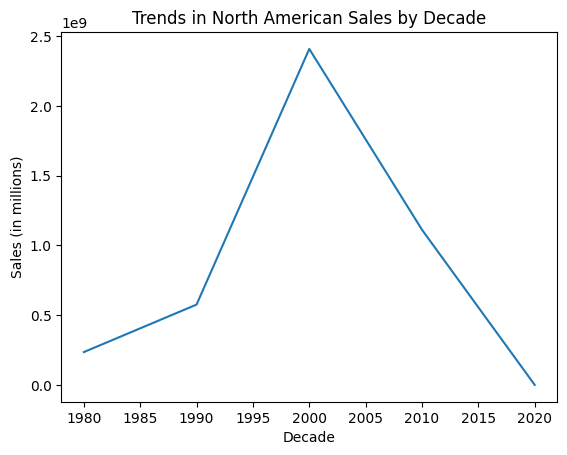

In [128]:
# # Trend of sales of video-games over the Decades in North America alone 
df['Decade'] = (df['Year'] // 10) * 10
decade_sales = df.groupby('Decade')['North_American_Sales'].sum()
decade_sales.plot(kind='line')
plt.title('Trends in North American Sales by Decade')
plt.ylabel('Sales (in millions)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14856\690899826.py:7: DtypeWarning: Columns (0,1,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Task1 Solution.csv')


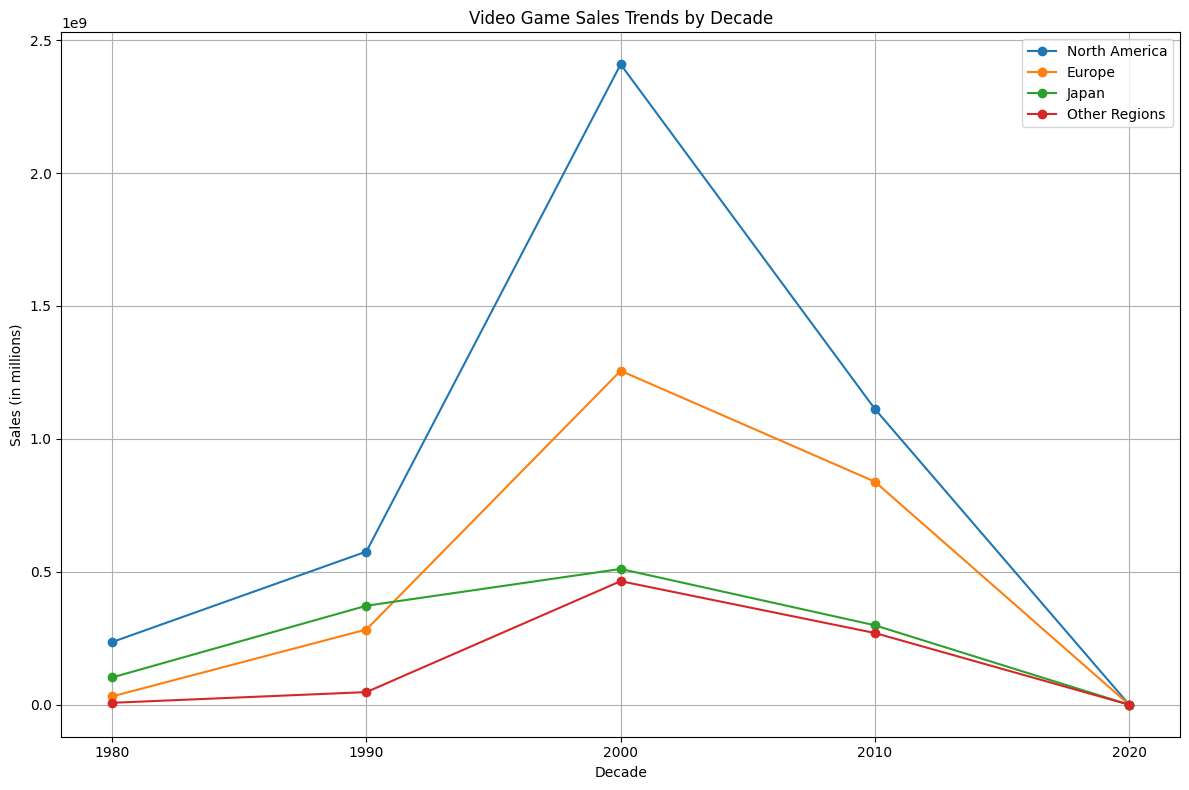

In [129]:
# Trend of sales of video-games over the Decades in every region 

import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Task1 Solution.csv')

# Create a 'Decade' column
df['Decade'] = (df['Year'] // 10) * 10

# Group by decade and sum sales for each region
decade_sales = df.groupby('Decade').agg({
    'North_American_Sales': 'sum',
    'European_Sales': 'sum',
    'Japanese_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

# Plotting the trends over decades
plt.figure(figsize=(12, 8))

plt.plot(decade_sales['Decade'], decade_sales['North_American_Sales'], marker='o', label='North America')
plt.plot(decade_sales['Decade'], decade_sales['European_Sales'], marker='o', label='Europe')
plt.plot(decade_sales['Decade'], decade_sales['Japanese_Sales'], marker='o', label='Japan')
plt.plot(decade_sales['Decade'], decade_sales['Other_Sales'], marker='o', label='Other Regions')

plt.title('Video Game Sales Trends by Decade')
plt.xlabel('Decade')
plt.ylabel('Sales (in millions)')
plt.xticks(decade_sales['Decade'])  # Ensure all decades are shown
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [134]:
# AFTER MY ANALYSIS ON PYTHON, I'M EXPORTING ALL MY DATA INTO A CSV FILE TO ALLOW ME LOAD IT UP TO TABLEAU PUBLIC SO I CAN MAKE VISUALIZATIONS. CHEERS!!
df.to_csv('cleaned_video_game_sales_1.csv', index=False)